In [1]:
from sklearn.model_selection import ParameterGrid
import numpy as np
import matplotlib.pyplot as plt
import torch as th
import torch.optim as optim

In [2]:
param_grid = {'lr': [0.1, 0.01, 0.001], 'beta1': [0.0, 0.9],'beta2': [0.999, 0.99]}
n_learning_rates = len(param_grid['lr'])
param_list = list(ParameterGrid(param_grid))

In [3]:
def func(x):
    return (x-4)**2


Adam Configuration: {'beta1': 0.0, 'beta2': 0.999, 'lr': 0.1}
Epoch 0: x=2.0999999046325684, loss=4.0
Epoch 20: x=3.504561424255371, loss=0.2897602617740631
Epoch 40: x=3.9337775707244873, loss=0.005529251880943775
Epoch 60: x=3.995177745819092, loss=3.1016206776257604e-05
Epoch 80: x=3.9997920989990234, loss=6.05396053288132e-08
Epoch 100: x=3.9999942779541016, loss=4.780531526193954e-11
Epoch 120: x=3.999999523162842, loss=2.2737367544323206e-13

Adam Configuration: {'beta1': 0.0, 'beta2': 0.99, 'lr': 0.1}
Epoch 0: x=2.0999999046325684, loss=4.0
Epoch 20: x=3.5102176666259766, loss=0.2841672897338867
Epoch 40: x=3.940497636795044, loss=0.004538387060165405
Epoch 60: x=3.996695041656494, loss=1.5130537576624192e-05
Epoch 80: x=3.999915838241577, loss=1.0608346201479435e-08
Epoch 100: x=3.9999990463256836, loss=1.4210854715202004e-12
Epoch 120: x=3.999999761581421, loss=5.684341886080802e-14

Adam Configuration: {'beta1': 0.9, 'beta2': 0.999, 'lr': 0.1}
Epoch 0: x=2.0999999046325684, 

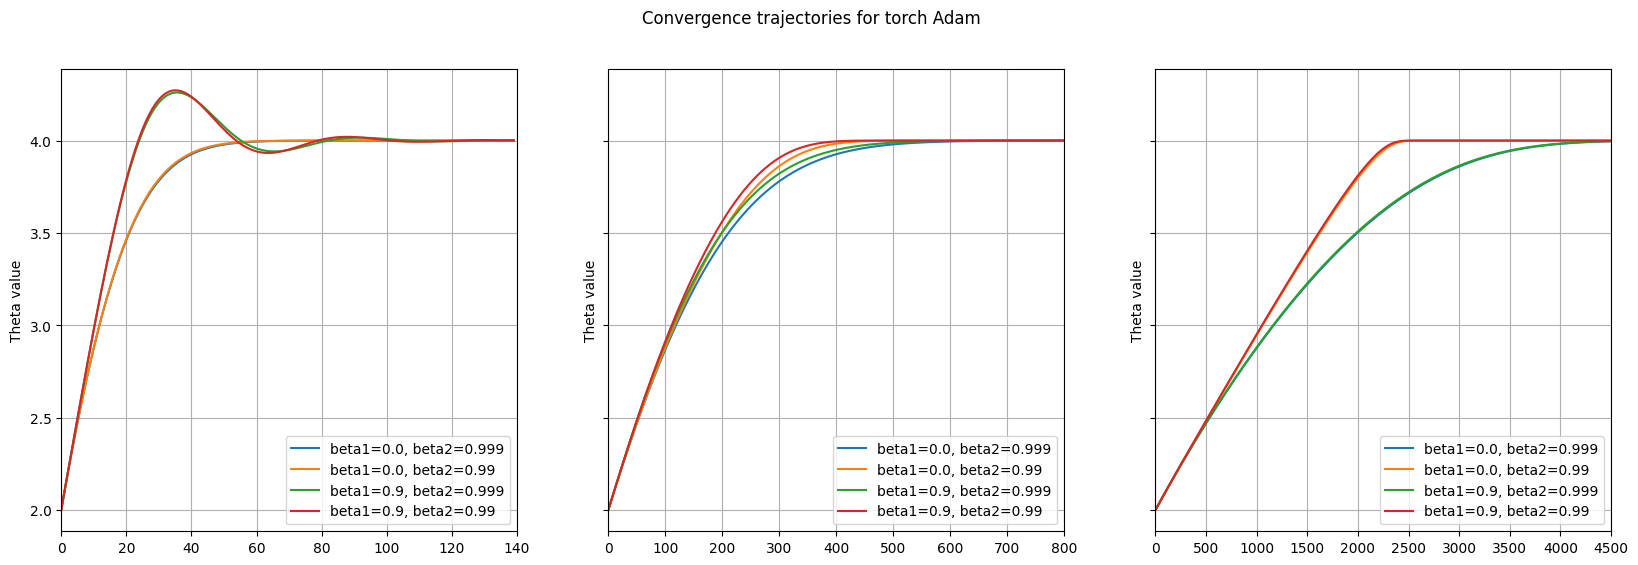

In [10]:
fig, axs = plt.subplots(ncols=n_learning_rates, figsize=(20, 6), sharex=False, sharey=True)   
fig.suptitle('Convergence trajectories for torch Adam')

for i, lr in enumerate(param_grid['lr']):

    ax = axs[i] if n_learning_rates > 1 else axs
    filtered_params = [p for p in param_list if p['lr'] == lr]

    if lr == 0.1:
        epochs = 140
    elif lr == 0.01:
        epochs = 800
    else:
        epochs = 4500

    for params in filtered_params:

        print(f'\nAdam Configuration: {params}')

        theta = th.tensor([2.0], requires_grad=True)
        optimizer = optim.Adam([theta], lr=params['lr'], betas=(params['beta1'], params['beta2']))
        theta_values = []

        for epoch in range(epochs):
            theta_values.append(theta.item())
            optimizer.zero_grad()

            loss = func(theta)
            loss.backward()

            optimizer.step()

            if epoch % 20 == 0:
                print(f'Epoch {epoch}: x={theta.item()}, loss={loss.item()}')

        label = f"beta1={params['beta1']}, beta2={params['beta2']}"
        ax.plot(theta_values, label=label)
        ax.set_xlim([0, epochs])
        ax.grid(True)
        ax.set_ylabel('Theta value')
        ax.legend(loc = 'best')